# Customer Segmentation-K-Means Clustering 

Author: Andrew Castillo 

In this notebook we perform customer segmentation using KMeans clustering. Various plots e.g., elbow plots, scatter plots, and silhouette plots were created to help analyze the clusters. The optimal number of clusters found was 3 and we give a detailed analysis of each cluster at the end of the notebook. 

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

In [4]:
df=pd.read_csv('../data/cluster_data.csv')

#gather the columns that we want 
X=df.iloc[:, 3:]

In [5]:
X.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,interactions,avg_credit_per_card,avg_credit_per_interaction
0,100000,2,1,1,0,2,50000.000000,50000.000000
1,50000,3,0,10,9,19,16666.666667,2631.578947
2,50000,7,1,3,4,8,7142.857143,6250.000000
3,30000,5,1,1,4,6,6000.000000,5000.000000
4,100000,6,0,12,3,15,16666.666667,6666.666667


In [6]:
#scale data due to the size of some of the features compared to others. 
scaler=MinMaxScaler()
scaled_feats=scaler.fit_transform(X)

In [7]:
scaled_feats

array([[0.49238579, 0.11111111, 0.2       , ..., 0.        , 1.        ,
        1.        ],
       [0.23857868, 0.22222222, 0.        , ..., 1.        , 0.3236715 ,
        0.04581598],
       [0.23857868, 0.66666667, 0.2       , ..., 0.35294118, 0.13043478,
        0.11870504],
       ...,
       [0.72081218, 0.77777778, 0.2       , ..., 0.52941176, 0.35326087,
        0.25833878],
       [0.85786802, 1.        , 0.2       , ..., 0.82352941, 0.33449275,
        0.20935252],
       [0.83248731, 0.88888889, 0.        , ..., 0.70588235, 0.36199678,
        0.23309353]])

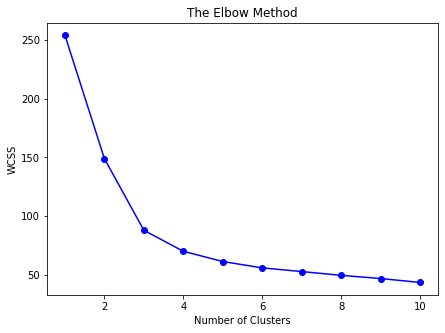

In [8]:
#lets get an idea of the number of clusters we can see from this data 
wcss = [] 
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters = n_clusters, random_state = 42) 
    kmeans.fit(scaled_feats)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(7,5))
plt.plot(range(1, 11), wcss, '-o', c='b')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.savefig('elbow_plot.jpg')
plt.show() 

It looks like the 'elbow' is at around 3 clusters. Let's also apply a silhouette analysis to see if we can gather anything from there.  

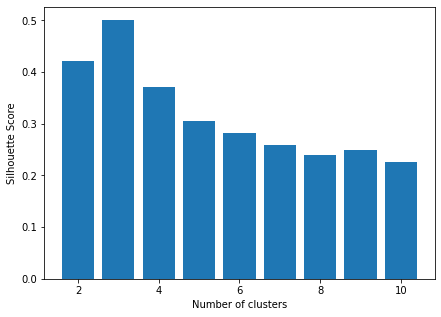

In [9]:
#check the #silhouette scores 
silhouette_scores = [] 
for n_clusters in range(2, 11):
    silhouette_scores.append(   
        silhouette_score(scaled_feats, KMeans(n_clusters = n_clusters).fit_predict(scaled_feats))) 
plt.figure(figsize=(7,5))    
k = range(2,11)
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()    

This plot again shows that three clusters seems to be the best choice of cluster. We will do one more analysis on the silhouette plots to see the size and average score. 

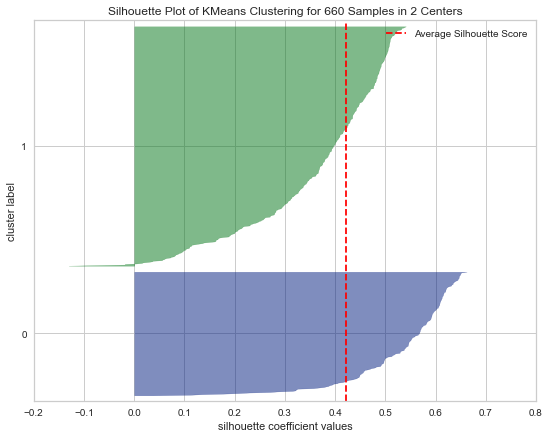

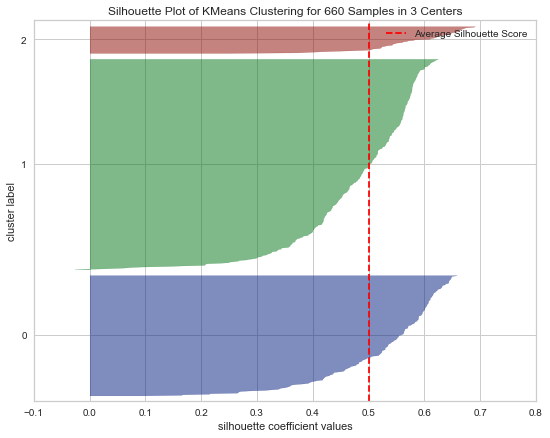

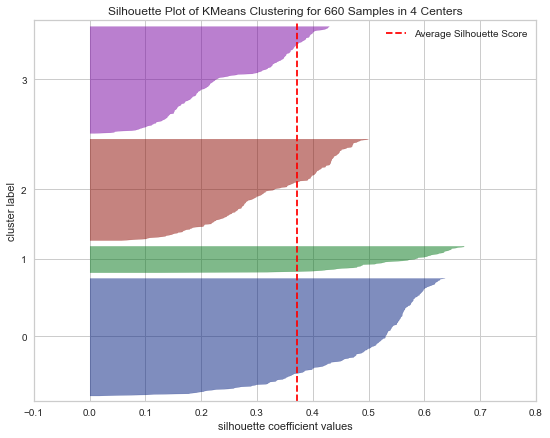

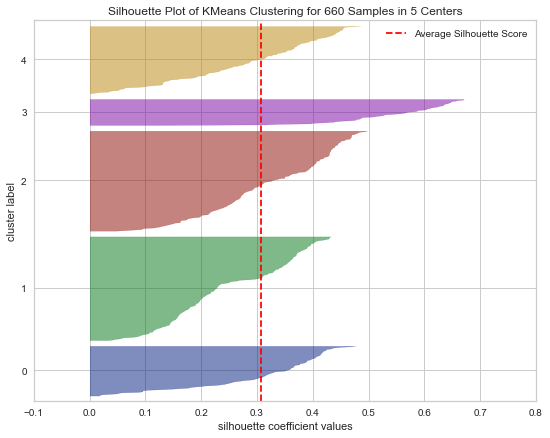

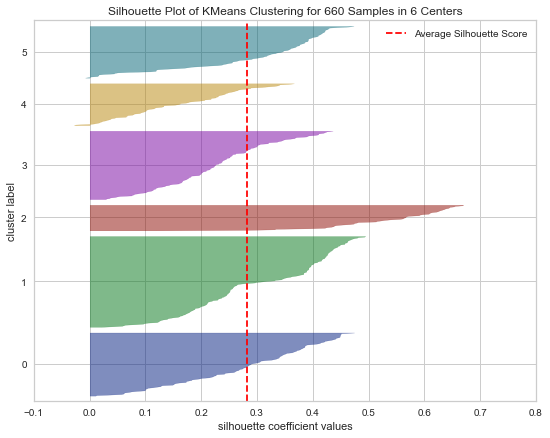

In [10]:
#We now graph the silhouette graph 
from yellowbrick.cluster import SilhouetteVisualizer

clusters=range(2, 7, 1)

#graph a plot for each cluster
for cluster in clusters:
    plt.figure(figsize=(9,7))
    km=KMeans(n_clusters =cluster , random_state = 42) 
    visualizer = SilhouetteVisualizer(km, colors='sns_dark')
    visualizer.fit(scaled_feats)       
    visualizer.show()
    plt.show()

These silhouette plots show that indeed 3 clusters is optimal in this situation. While the first cluster is significantly larger than the other two, the average silhouette score is higher than the others. Here is the 3 cluster silhouette plot for an indivisual viewing.  

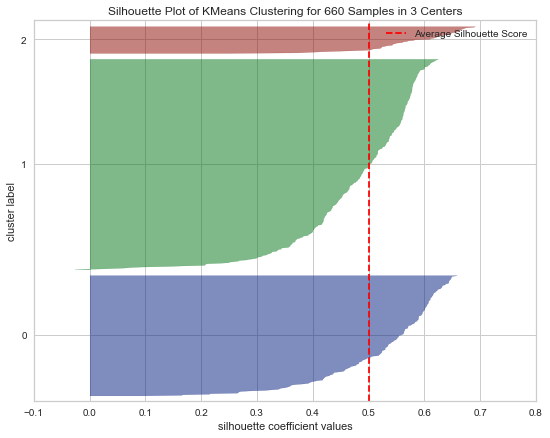

In [11]:
#looking at the three cluster silhouette plot 
plt.figure(figsize=(9,7))
km=KMeans(n_clusters =3 , random_state = 42) 
visualizer = SilhouetteVisualizer(km, colors='sns_dark')
visualizer.fit(scaled_feats)       
#plt.savefig('silhouette_plot.jpg', bbox_inches='tight')
visualizer.show(outpath="silhouette_plot.jpg")
plt.show()

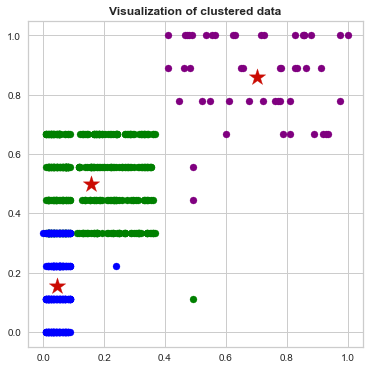

In [12]:
#see the clusters and centers 
km = KMeans(n_clusters=3, max_iter=100)
km.fit(scaled_feats)
labels = km.fit_predict(scaled_feats)
centroids = km.cluster_centers_

# Plot the clustered data
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(scaled_feats[labels == 0, 0], scaled_feats[labels == 0, 1],
            c='green', label='cluster 1')
plt.scatter(scaled_feats[labels == 1, 0], scaled_feats[labels == 1, 1],
            c='blue', label='cluster 2')
plt.scatter(scaled_feats[labels == 2, 0], scaled_feats[labels == 2, 1],
            c='purple', label='cluster 3')

plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
            c='r', label='centroid')
plt.title('Visualization of clustered data', fontweight='bold')
plt.savefig('cluster_image.jpg')
plt.show()

Let's now try to examine each of the individual clusters. 

In [13]:
#Get the predictions for the clusters
km = KMeans(n_clusters = 3, random_state = 42)
y_km = km.fit_predict(X)

In [23]:
#Calculate the silhouette_score
from sklearn.metrics import silhouette_score
kmeans_score= silhouette_score(scaled_feats,y_km)
print('The silhouette score for KMeans clustering is {0:.4f}'.format(kmeans_score))

The silhouette score for KMeans clustering is 0.1541


In [19]:
#put the prediction into a data frame for merging later 
cluster_pred=pd.DataFrame(y_km, columns=['cluster_pred'])

#combine the prediction with the original data 
X=pd.concat([X, cluster_pred], axis=1)
X.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,interactions,avg_credit_per_card,avg_credit_per_interaction,cluster_pred
0,100000,2,1,1,0,2,50000.000000,50000.000000,0
1,50000,3,0,10,9,19,16666.666667,2631.578947,0
2,50000,7,1,3,4,8,7142.857143,6250.000000,0
3,30000,5,1,1,4,6,6000.000000,5000.000000,1
4,100000,6,0,12,3,15,16666.666667,6666.666667,0


In [20]:
#save this data to a csv 
X.to_csv('data_with_predicted_clusters.csv')

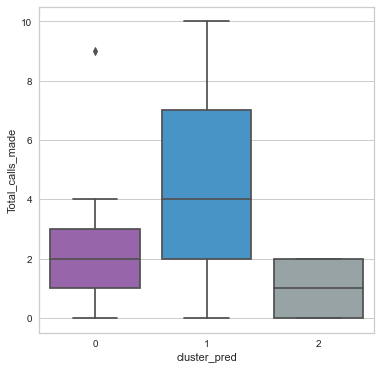

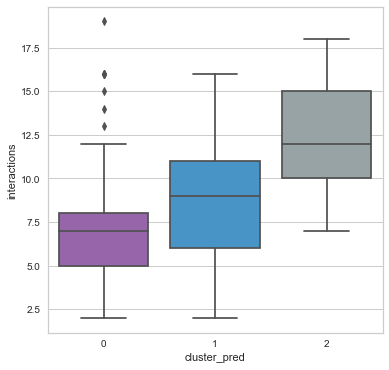

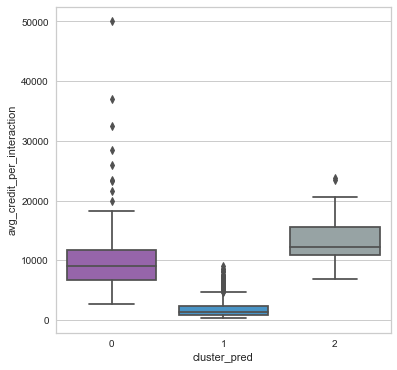

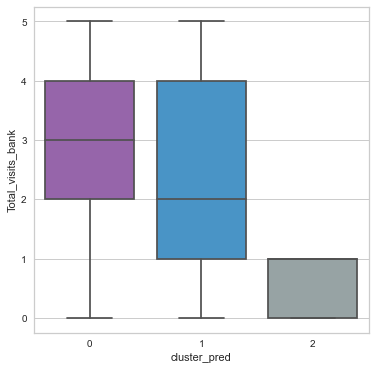

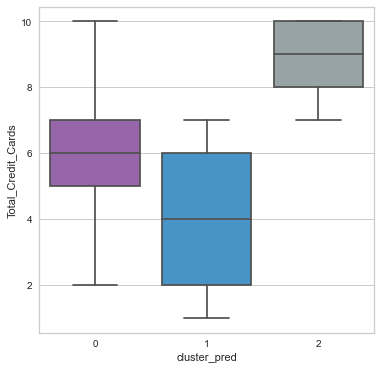

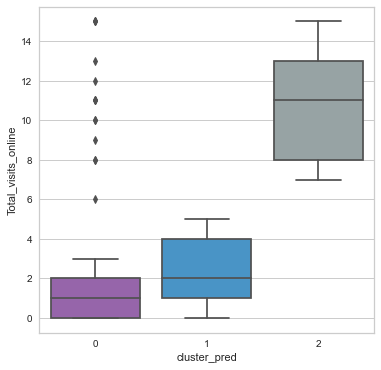

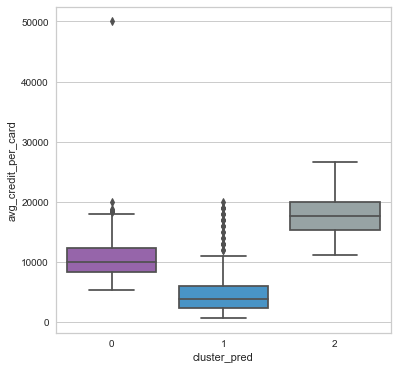

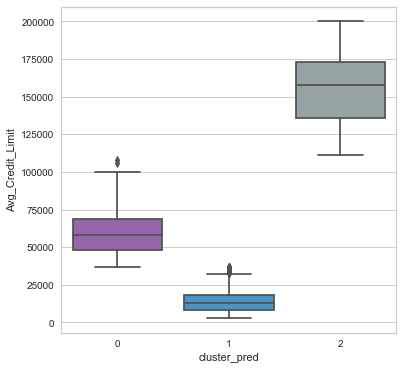

In [21]:
#analyze the data using box plots 
feats=list(set(X.columns)-set(cluster_pred))
for feat in feats:
    plt.figure(figsize=(6,6))
    flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
    sns.set_palette(sns.color_palette(flatui))
    sns.boxplot(x='cluster_pred', y=feat, data=X)
    plt.show()

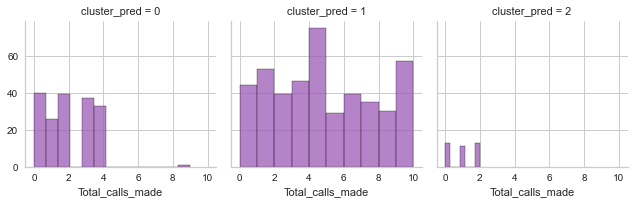

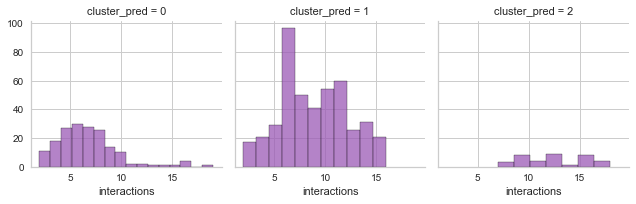

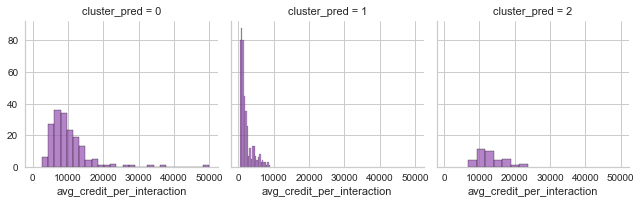

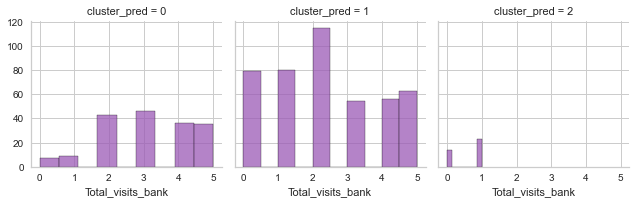

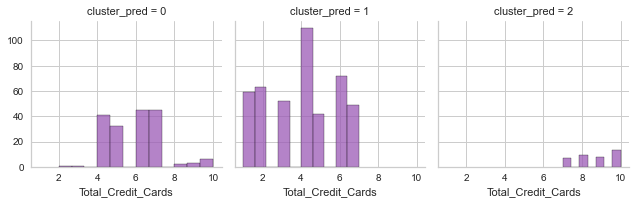

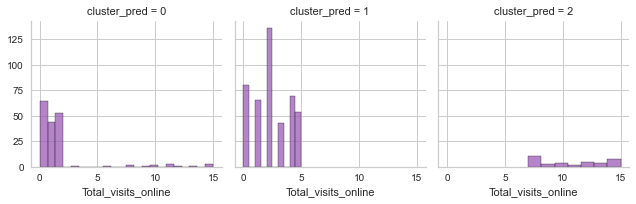

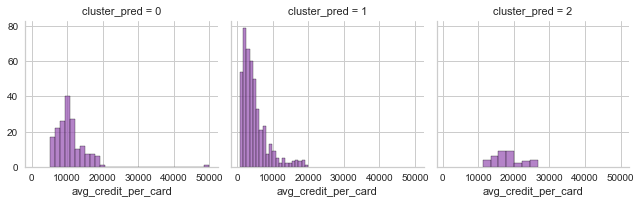

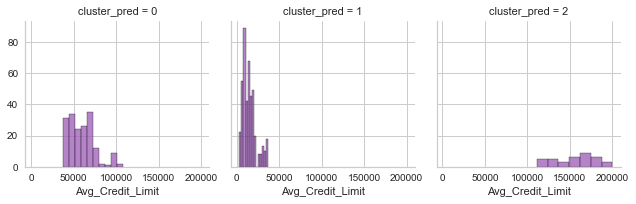

In [24]:
for feat in feats:
    g = sns.FacetGrid(X, col = 'cluster_pred')
    g.map(sns.histplot, feat)

Summary of what we are seeing from the boxplots and histograms: 

- Cluster 0: 
    - Had the second most average credit limit, almost no visits online, the most visits to the bank, the least amount of interactions, and the second most credit cards. 
- Cluster 1: 
    - Seem to have the lower overall credit limit, median of two visits online (with the most visits online) and in person, about a median of 9 interactions (and the most interactions) made with the lowest number of credit cards. The credit limit for cluster 1 was lower on average but had much more customers than the previous two clusters. 
- Cluster 2: 
   - The users have the most avg credit limit, make more online visits than in person, they make the least amount of calls, have more credit cards and higher median interaction than the previous two clusters. There are definitely less of these customers with high credit limits. This could be due to high income availability of these customers. 

__Final Analysis of Customer Clusters using KMeans:__

- __Cluster 0:__ This cluster is in between the next two clusters on average. The credit limits seem to indicate that these are middle class customers that have a good amount of interactions with the bank. This would indicate that these are responsible customers from a business standpoint. Depending on the length of their time with the bank, it could be worthwhile to extend their potential lines of credit to hopefully increase their credit spending activity, resulting in more business revenue for the bank. 

- __Cluster 1:__ Since this cluster has the most customers within it, many of the metrics are highest here. Given that these customers tend to have lower average credit limits as well as lower number of credit cards, this may signal that they have a lower income or have developing credit. It may be worthwhile business wise to interact with these customers to potentially reduce churn and potential credit default. This can be done via check in emails, calls, amd account reminders when visiting online. 

- __Cluster 2:__ Given the high credit limits of these customers along with the most interactions, it would suggest that these customers are high quality customers. This may indicate that not only do these customers have a higher average income but are also more responsible. This would suggest that these customers can be very profitable from an advertisement standpoint. 